In [1]:
from sklearn import datasets as ds 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

train_x , train_y = ds.load_svmlight_file('a9a.txt')
test_x , test_y = ds.load_svmlight_file('a9a.t')

train_y = ( train_y + 1 ) / 2
test_y = ( test_y + 1 ) / 2

x_train_array = train_x.toarray()
x_test_array = test_x.toarray()

zeros_column = np.zeros(len(x_test_array))
x_test_array = np.column_stack((x_test_array,zeros_column))

theta = np.zeros(123)
rate = 0.001

In [2]:
def function_h(x,theta_next):
    product = - np.dot(theta_next.T,x)
    return (1/(1+np.exp(product)))

In [3]:
def compute_descent(array_x,array_y,theta_next):
    length = len(array_x)
    sum = np.zeros(123)
    for i in range(length):
        sum = sum + (function_h(array_x[i],theta_next) - array_y[i])*array_x[i]
    return sum / length

In [4]:
def compute_loss():
    sum = 0
    length = len(x_test_array)
    for i in range(length):
        h = function_h(x_test_array[i],theta)
        sum = sum + ( np.log( h ) * test_y[i] + ( 1 - test_y[i] ) * np.log( 1 - h ))
    return - sum / length

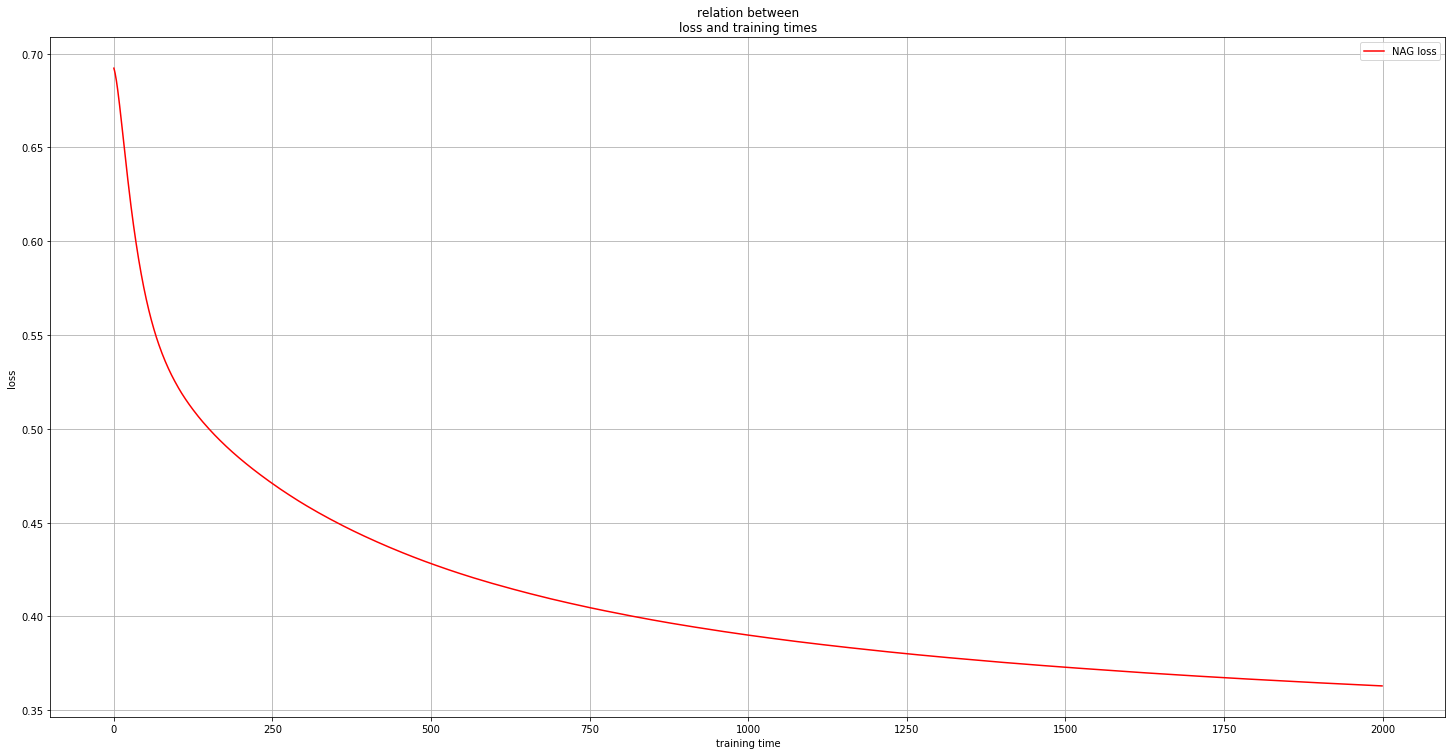

In [5]:
#NAG
theta = np.zeros(123)
loss_NAG = []
v = np.zeros(123)
rate = 0.001
for i in range(2000):
    train_x_part1, train_x_part2,train_y_part1, train_y_part2 = train_test_split(x_train_array, train_y, test_size=0.1)
    v_pre = v
    descent = compute_descent(train_x_part2,train_y_part2,theta)
    v = 0.9 * v - rate * descent
    theta = theta - 0.9 * v_pre + ( 1 + 0.9 ) * v 
    loss_NAG.append(compute_loss())

plt.figure(figsize=(25,12.5)) 
plt.plot(loss_NAG,label= "NAG loss",color = 'red')
plt.legend(loc='upper right')
plt.title('relation between\nloss and training times')
plt.xlabel('training time')
plt.ylabel('loss')
plt.grid()
plt.show()

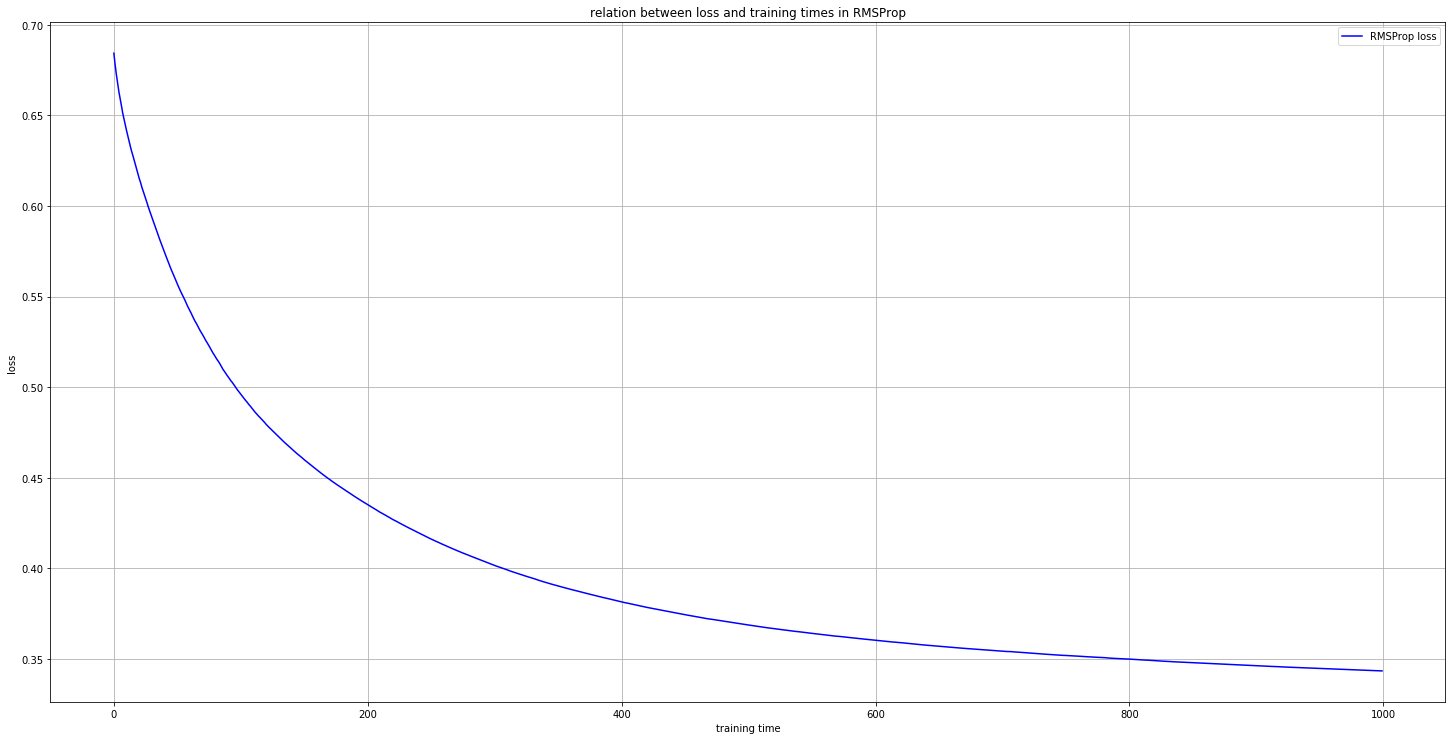

In [6]:
#RMSProp loss
theta = np.zeros(123)
loss_RMSProp = []
g = np.zeros(123)
rate = 0.001

for i in range(1000):
    train_x_part1, train_x_part2,train_y_part1, train_y_part2 = train_test_split(x_train_array, train_y, test_size=0.02)
    descent = compute_descent(train_x_part2,train_y_part2,theta)
    g = 0.9 * g + 0.1 * descent * descent
    theta = theta - (rate / ( np.power(g + np.exp(-8),1/2))) * descent
    loss_RMSProp.append(compute_loss())
    
plt.figure(figsize=(25,12.5))
plt.plot(loss_RMSProp,label= "RMSProp loss",color = 'blue')
plt.legend(loc='upper right')
plt.title('relation between loss and training times in RMSProp')
plt.xlabel('training time')
plt.ylabel('loss')
plt.grid()
plt.show()

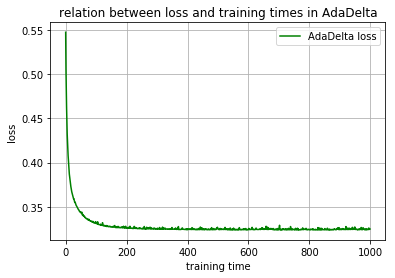

In [7]:
#AdaDelta loss
theta = np.zeros(123)
loss_AdaDelta = []
g = np.zeros(123)
t = np.zeros(123)

for i in range(1000):
    train_x_part1, train_x_part2,train_y_part1, train_y_part2 = train_test_split(x_train_array, train_y, test_size=0.02)
    descent = compute_descent(train_x_part2,train_y_part2,theta)
    g = 0.95 * g + 0.05 * descent * descent
    change_theta = - (np.power(t + np.exp(-8) ,1/2 ) / ( np.power(g + np.exp(-8),1/2))) * descent
    theta = theta + change_theta
    t = 0.95 * t + 0.05 * change_theta * change_theta
    loss_AdaDelta.append(compute_loss())

plt.plot(loss_AdaDelta,label= "AdaDelta loss",color = 'green')
plt.legend(loc='upper right')
plt.title('relation between loss and training times in AdaDelta')
plt.xlabel('training time')
plt.ylabel('loss')
plt.grid()
plt.show()

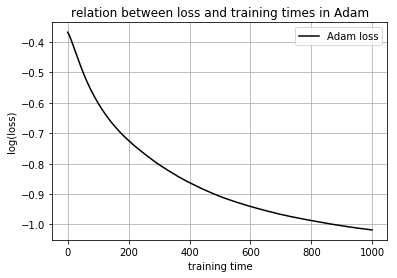

In [8]:
# Adam loss
theta = np.zeros(123)
loss_Adam = []
m = np.zeros(123)
g = np.zeros(123)

for i in range(1000):
    train_x_part1, train_x_part2,train_y_part1, train_y_part2 = train_test_split(x_train_array, train_y, test_size=0.01)
    descent = compute_descent(train_x_part2,train_y_part2,theta)
    m = 0.9 * m + 0.1 * descent
    g = 0.999 * g + 0.001 * descent * descent
    learning_rate = 0.001 * np.power(1-0.999**(i+1),1/2) / (1 - 0.9**(i+1))
    theta = theta - learning_rate * m / np.power( g + np.exp(-8),1/2)
    loss_Adam.append(np.log(compute_loss()))

plt.plot(loss_Adam,label= "Adam loss",color = 'black')
plt.legend(loc='upper right')
plt.title('relation between loss and training times in Adam')
plt.xlabel('training time')
plt.ylabel('log(loss)')
plt.grid()
plt.show()